In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("../ecommerce_customer.csv")

print("Initial Shape:", df.shape)
print(df.info())

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill numerical missing values with median
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Filling with median values for rate_columns
rate_columns = ["Cart_Abandonment_Rate",
    "Returns_Rate",
    "Email_Open_Rate",
    "Discount_Usage_Rate"]

for col in rate_columns:
    df[col] = df[col].fillna(df[col].median())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

#Removing unnecessary columns
columns_to_remove = [
    "City",
    "Signup_Quarter",
    "Lifetime_Value"
]

df.drop(columns=columns_to_remove, inplace=True)

print("\nShape after cleaning:", df.shape)
df.head()


Initial Shape: (50000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Pur

,Age,Gender,Country,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,...,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Credit_Balance,Churned
0,43.0,Male,France,2.9,14.0,27.4,6.0,50.6,3.0,9.0,...,46.40,2.0,17.9,9.0,4.0,16.3,20.8,1.0,2278.0,0
1,36.0,Male,UK,1.6,15.0,42.7,10.3,37.7,1.0,19.5,...,57.96,9.2,42.8,7.0,3.0,27.6,23.3,3.0,3028.0,0
2,45.0,Female,Canada,2.9,10.0,24.8,1.6,70.9,1.0,9.1,...,12.24,11.5,0.0,4.0,1.0,27.6,8.8,2.0,2317.0,0
3,56.0,Female,USA,2.6,10.0,38.4,14.8,41.7,9.0,15.0,...,44.10,5.4,41.4,2.0,5.0,85.9,31.0,3.0,2674.0,0
4,35.0,Male,India,3.1,29.0,51.4,8.4,19.1,9.0,32.5,...,25.20,5.5,37.9,1.0,11.0,83.0,50.4,4.0,5354.0,0


In [3]:
# Checking categorical columns and applying label encoding
from sklearn.preprocessing import LabelEncoder

#Finding categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

label_encoder = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder[col] = le
df[cat_cols].head()

Index(['Gender', 'Country'], dtype='object')


,Gender,Country
0,1,2
1,1,6
2,0,1
3,0,7
4,1,4


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (original numeric only)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# OPTIONAL: remove label-encoded categorical columns if needed
# Example: categorical columns you encoded earlier
encoded_cat_cols = ['gender','city']  # change as per your data
numerical_cols = [col for col in numerical_cols if col not in encoded_cat_cols]

print("Numerical Columns for Scaling:", numerical_cols)

# Apply Standardization ONLY on numerical columns
Standard_scalar = StandardScaler()
df[numerical_cols] = Standard_scalar.fit_transform(df[numerical_cols])

# Final dataframe (categorical + scaled numerical)
print("Standardized DataFrame:")
print(df.head())

Numerical Columns for Scaling: ['Age', 'Gender', 'Country', 'Membership_Years', 'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases', 'Average_Order_Value', 'Days_Since_Last_Purchase', 'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written', 'Social_Media_Engagement_Score', 'Mobile_App_Usage', 'Payment_Method_Diversity', 'Credit_Balance', 'Churned']
Standardized DataFrame:
        Age    Gender   Country  Membership_Years  Login_Frequency  \
0  0.449670  0.902336 -0.969735         -0.040799         0.304118   
1 -0.157149  0.902336  0.613454         -0.672148         0.432150   
2  0.623047 -0.963614 -1.365533         -0.040799        -0.208008   
3  1.576619 -0.963614  1.009252         -0.186495        -0.208008   
4 -0.243837  0.902336 -0.178141          0.056331         2.224591   

   Session_Duration_Avg  Pages_Per_Session  Cart_Abandonment_Rate  \
0       

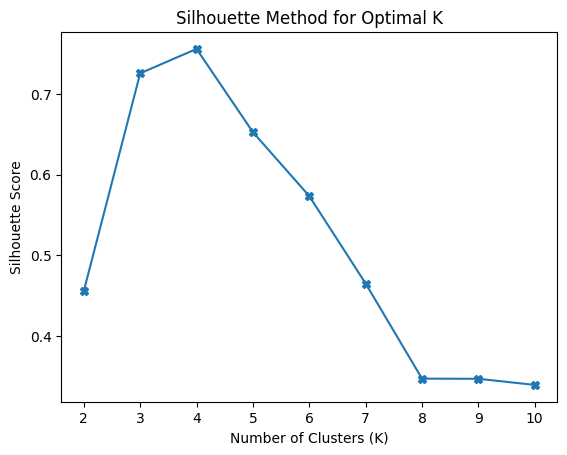

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Step 1: Create dataset (replace with your own dataset if needed)
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)

# Step 2: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply Silhouette Method
silhouette_scores = []
k_range = range(2, 11)  # Silhouette score works for K >= 2

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Step 4: Visualization
plt.figure()
plt.plot(k_range, silhouette_scores, marker='X')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal K")
plt.show()


In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from scipy.stats import mode

# Step 1: Create dataset (true labels only for evaluation)
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_scaled)

# Step 5: Predict clusters on train and test data
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

# Step 6: Map cluster labels to true labels for train
mapped_labels_train = np.zeros_like(train_clusters)
for i in range(4):
    mask = train_clusters == i
    mapped_labels_train[mask] = mode(y_train[mask])[0]
y_train_pred = mapped_labels_train

# Step 7: Map cluster labels to true labels for test
mapped_labels_test = np.zeros_like(test_clusters)
for i in range(4):
    mask = test_clusters == i
    mapped_labels_test[mask] = mode(y_test[mask])[0]
y_test_pred = mapped_labels_test

# Step 8: Confusion Matrix & Accuracy
cm = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)


# ================= TRAIN RESULTS =================
print("===== TRAIN RESULTS =====")

print("Train Accuracy:",
      accuracy_score(y_train, y_train_pred))

print("\nTrain Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))


# ================= TEST RESULTS =================
print("\n===== TEST RESULTS =====")

print("Test Accuracy:",
      accuracy_score(y_test, y_test_pred))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

===== TRAIN RESULTS =====
Train Accuracy: 1.0

Train Confusion Matrix:
[[92  0  0  0]
 [ 0 90  0  0]
 [ 0  0 91  0]
 [ 0  0  0 77]]

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        77

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350


===== TEST RESULTS =====
Test Accuracy: 1.0

Test Confusion Matrix:
[[33  0  0  0]
 [ 0 35  0  0]
 [ 0  0 34  0]
 [ 0  0  0 48]]

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        34
           3       1.00    